In [81]:
# build a simple linear regression in python
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

# Importing data 

In [9]:
df = pd.read_csv('kc_house_data_train.csv')

In [10]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


# Establishing Baseline:

In [91]:
y = df[['price']]
X = df.drop(['price'], axis=1)
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.6951727830234272

# Exploring Data: Missing Values

In [92]:
# make a list of the variables that contain missing values
vars_na = [var for var in df.columns if df[var].isnull().sum()>1]
# Print variable name and % missing
vars_na
# There is no missing data

[]

# Exploring Data: Numerical Values

In [93]:
num_var = [var for var in df.columns if df[var].dtypes !='O']

In [94]:
df[num_var]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,0,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,0,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,0,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,0,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,0,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,0,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,0,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,0,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


# Exploring Data: Years Variables

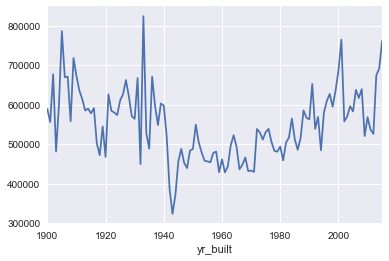

In [95]:
df.groupby('yr_built')['price'].mean().plot()

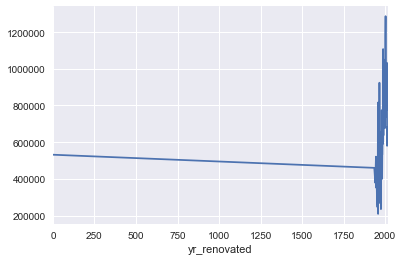

In [96]:
df.groupby('yr_renovated')['price'].mean().plot()

In [97]:
years_var = [var for var in num_var if 'yr' in var]
years_var

['yr_built', 'yr_renovated']

In [98]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,0,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,0,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,0,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,0,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,0,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,0,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,0,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,0,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [99]:
discrete_var = [var for var in num_var if len(df[var].unique())<20 and var not in years_var+['id']]

In [100]:
discrete_var

['date', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

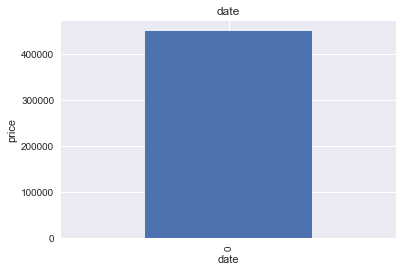

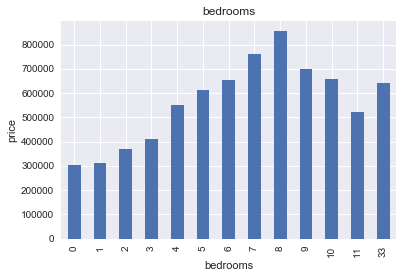

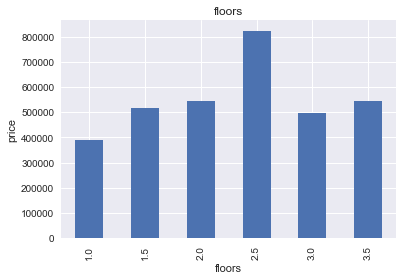

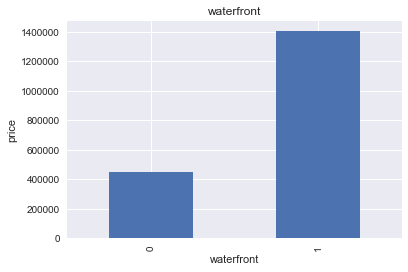

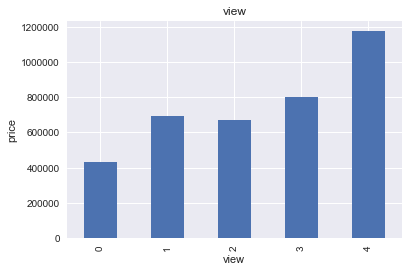

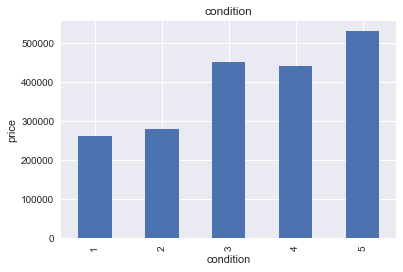

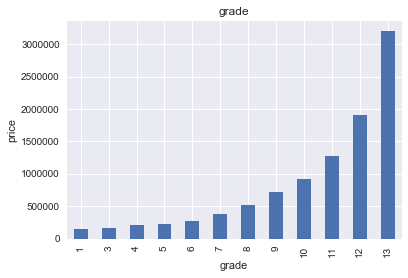

In [101]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var in discrete_var:
    analyse_discrete(df, var)

# Exploring Data: Continous Variables

In [102]:
cont_var = [var for var in num_var if var not in discrete_var+years_var]

In [103]:
cont_var

['Unnamed: 0',
 'id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

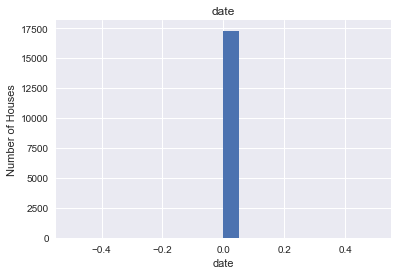

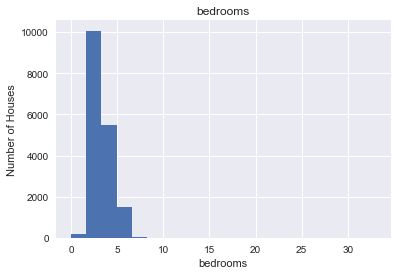

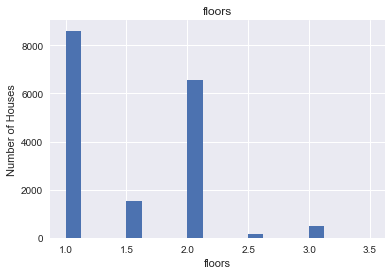

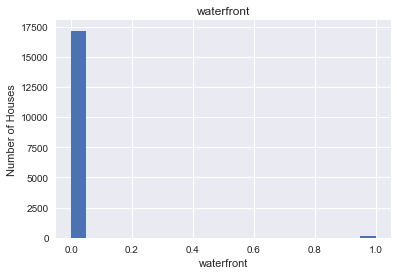

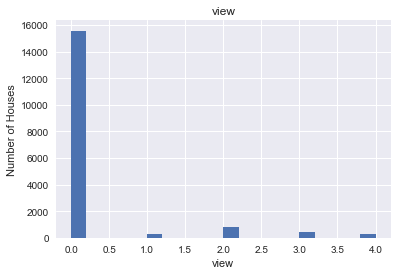

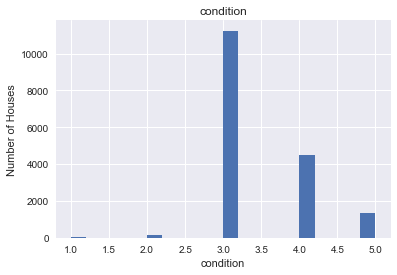

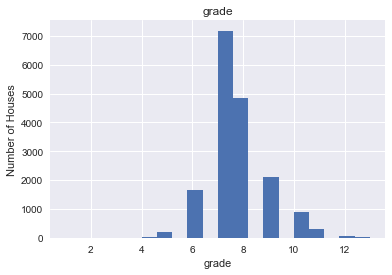

In [104]:
def analyse_cont(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.xlabel(var)
    plt.title(var)
    plt.ylabel('Number of Houses')
    plt.show()
    
for var in discrete_var:
    analyse_cont(df, var)

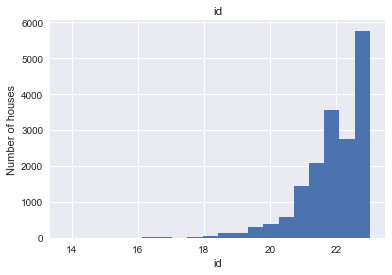

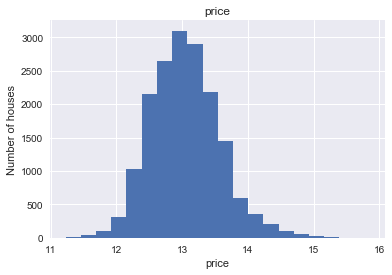

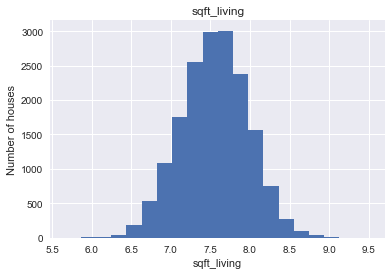

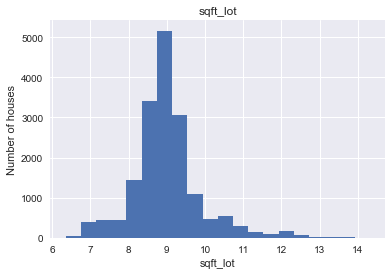

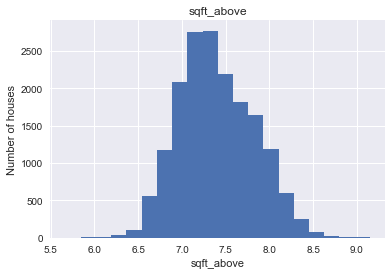

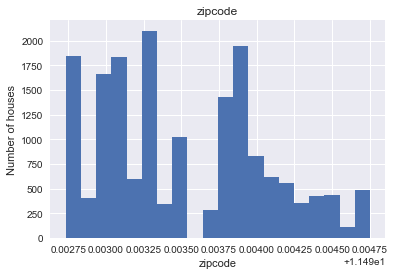

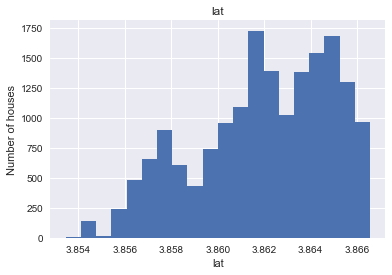

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


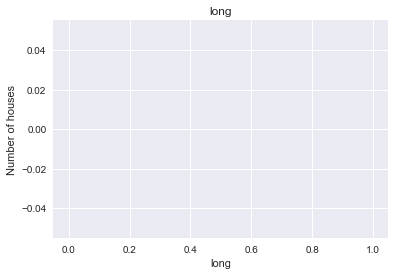

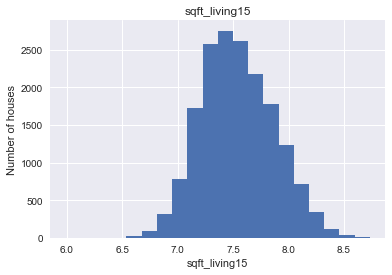

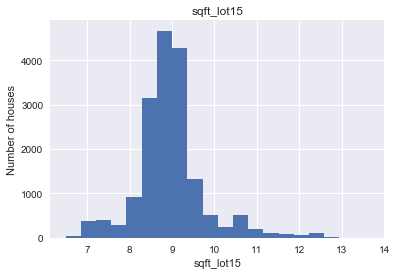

In [105]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_var:
    analyse_transformed_continous(df, var)

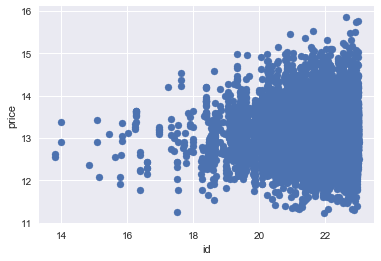

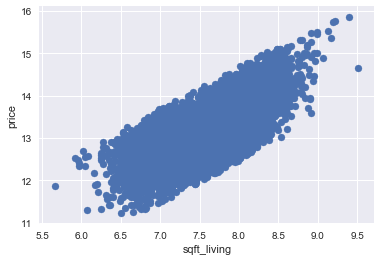

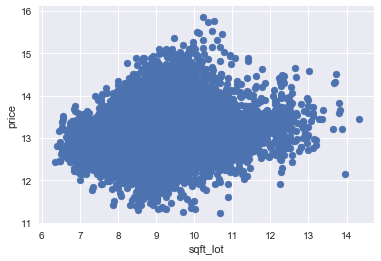

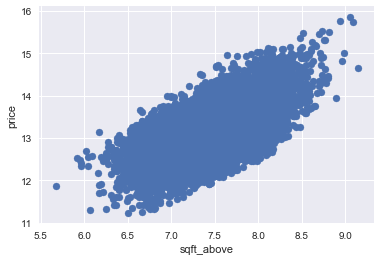

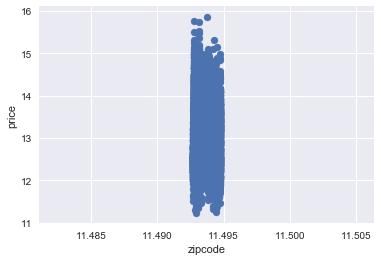

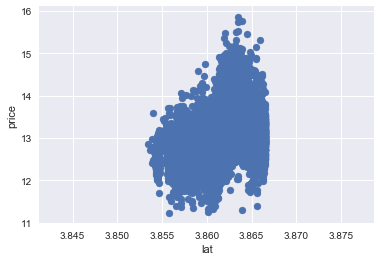

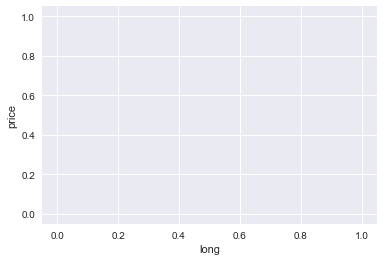

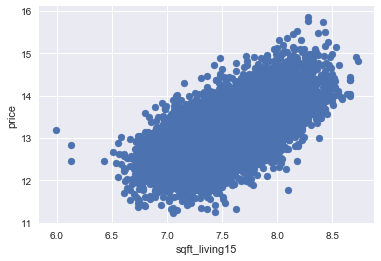

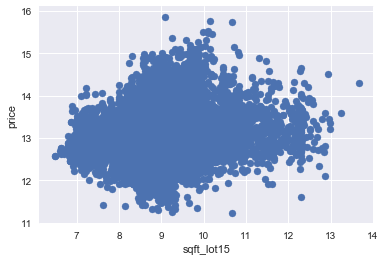

In [106]:
# let's explore the relationship between the house price and the transformed variables
# with more detail
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['price'] = np.log(df['price'])
        plt.scatter(df[var], df['price'])
        plt.ylabel('price')
        plt.xlabel(var)
        plt.show()
    
for var in cont_var:
    if var !='price':
        transform_analyse_continous(df, var)

# Exploring Data: Outliers

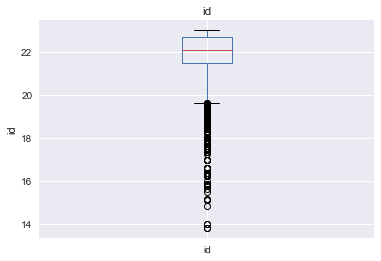

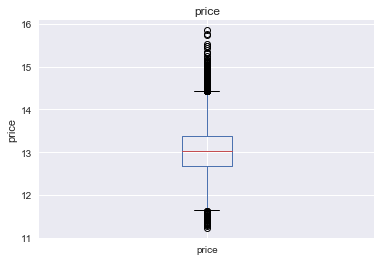

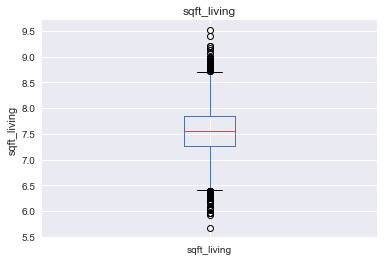

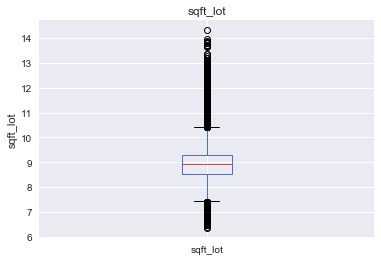

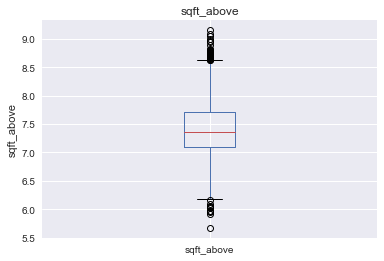

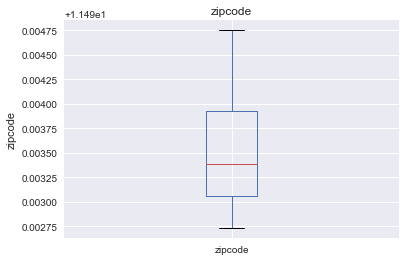

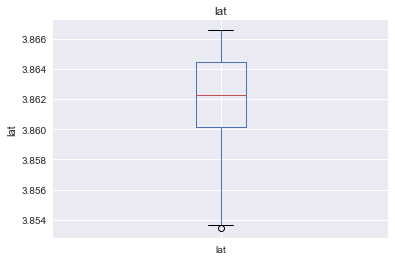

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


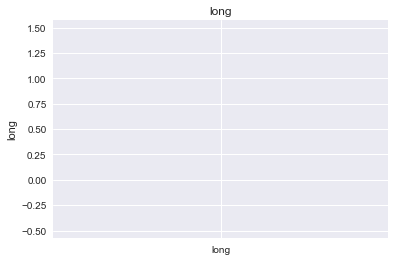

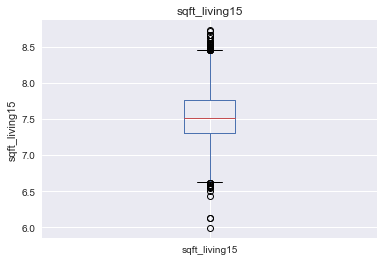

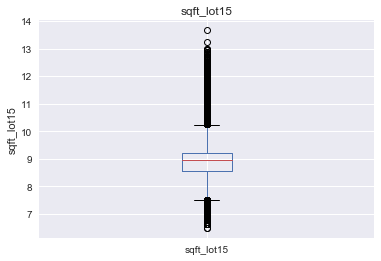

In [107]:
def outliers(df, var):
    df=df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var]=np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
for var in cont_var:
    outliers(df, var)

# Exploring Data: Categorical Values

In [108]:
df.dtypes

Unnamed: 0         int64
id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Create Train and Test Data:

In [109]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [122]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,0,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,0,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,0,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,0,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [110]:
lr_model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_above+long+grade+condition+yr_renovated+yr_built+view+waterfront+ sqft_living15+sqft_lot15', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2524.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:32:05   Log-Likelihood:            -2.3716e+05
No. Observations:               17290   AIC:                         4.744e+05
Df Residuals:                   17276   BIC:                         4.745e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.306e+07    1.8e+06     -7.267      0.000   -1.66e+07   -9.54e+06
bedrooms      -3.891e+04   2255.672    -17.251      0.000   -4.33e+04   -3.45e+04
bathrooms      4.918e+04   3822.737     12.865      0.000    4.17e+04    5.67e+04
sqft_living     158.0023      5.057     31.243      0.000     148.090     167.915
sqft_above       15.8646      4.743      3.345      0.001       6.567      25.162
long          -1.524e+05   1.42e+04    -10.711      0.000    -1.8e+05   -1.25e+05
grade          1.168e+05   2576.360     45.335      0.000    1.12e+05    1.22e+05
condition      2.058e+04   2820.100      7.299      0.000    1.51e+04    2.61e+04
yr_renovated     11.3858      4.452      2.557      0.011       2.659      20.112
yr_built      -3243.1895     83.972    -38.622      0.000   -3407.783   -3078.596
view           4.095e+04   2561.014     15.990      0.000    3.59e+04     4.6e+04
waterfront     5.879e+05   2.06e+04     28.499      0.000    5.47e+05    6.28e+05
sqft_living15    32.1374      4.140      7.763      0.000      24.023      40.252
sqft_lot15       -0.4159      0.065     -6.442      0.000      -0.542      -0.289
==============================================================================
Omnibus:                    13447.529   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1083967.962
Skew:                           3.140   Prob(JB):                         0.00
Kurtosis:                      41.278   Cond. No.                     3.25e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
labels = df['price']
conv_dates = [1 if values ==2014 else 0 for values in df.date]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'], axis=1)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = .1, random_state=2)

In [113]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
reg.score(x_test, y_test)

0.7069474705782309

In [115]:
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (15561, 20) Target:  (15561,)
Training set - Features:  (1729, 20) Target:  (1729,)


In [116]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(x_train, y_train)


print(lm.intercept_)
print('/')
print(lm.coef_)

5179636.36890315
/
[-3.12158714e-01  7.03532823e-08 -3.64430632e+04  3.99820674e+04
  1.17122431e+02  1.34879188e-01  7.14498404e+03  5.76325398e+05
  5.30858930e+04  2.57607929e+04  9.61150264e+04  7.37042691e+01
  4.34181616e+01 -2.68646717e+03  1.51833012e+01 -5.67076089e+02
  6.02912965e+05 -2.15714837e+05  1.94473657e+01 -3.51688058e-01]


In [123]:
print ("R2 Score:", lm.score(x_train, y_train))

R2 Score: 0.6972823272671351


In [118]:
y_train_pred = lm.predict(x_train)

In [119]:
y_train_pred

array([522520.73147981, 914773.94769485, 715164.94231692, ...,
       304350.11061281, 540242.32877544,  82624.79753189])

In [106]:
df['yr_built'] = df["yr_built"].astype(str)

In [4]:
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

In [5]:
df['yr_old'] =  df['yr_built'].map(lambda x: 2020-x.year )

In [6]:
#df.yr_renovated = df.yr_renovated.astype(str)